# 단순선형회귀
## Gradient Tape 사용법

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tf.__version__

'2.8.2'

In [40]:
# 단순 선형 회귀
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

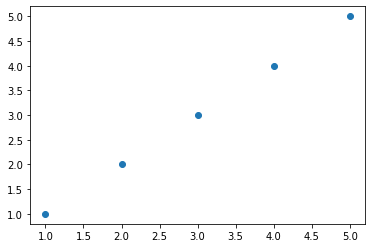

In [8]:
plt.plot(x_data, y_data, 'o')

In [10]:
v = [1,2,3,4]
tf.reduce_mean(v)
# reduce는 차원을 줄어든다는 의미

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [11]:
tf.square(v)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1,  4,  9, 16], dtype=int32)>

In [14]:
w = np.array([[1,2],[3,4]])
tf.reduce_sum(w)

<tf.Tensor: shape=(), dtype=int64, numpy=10>

In [26]:
# y_hat = Wx + b

# W는 Weight, tensor 상에서 variable type이어야 업데이트 가능
W = tf.Variable(2.0) # 가중치 W 초기화
b = tf.Variable(0.5) # b값 초기화

In [27]:
y_hat = W * x_data + b

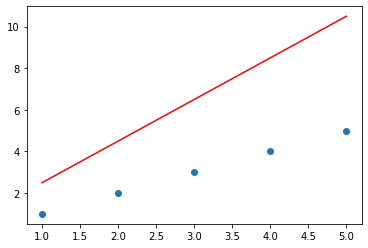

In [18]:
plt.plot(x_data, y_hat, 'r-')
plt.plot(x_data, y_data, 'o')
plt.show()

In [19]:
# Gradient Tape 사용
lr = 0.01 #learning rate
with tf.GradientTape() as tape:
  y_hat = W * x_data + b
  cost = tf.reduce_mean(tf.square(y_hat - y_data)) # MSE

W_grad, b_grad = tape.gradient(cost, [W,b])
W.assign_sub(lr * W_grad)
b.assign_sub(lr * b_grad)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.43>

In [20]:
W, b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.75>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.43>)

In [28]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)
lr = 0.01
EPOCH = 101

In [38]:
for i in range(EPOCH):
    with tf.GradientTape() as tape:
      y_hat = W * x_data + b
      cost = tf.reduce_mean(tf.square(y_hat - y_data)) # MSE

      W_grad, b_grad = tape.gradient(cost, [W,b])
      W.assign_sub(lr * W_grad)
      b.assign_sub(lr * b_grad)

      if i % 10 == 0:
       print(f"W : {W.numpy()}, b : {b.numpy()}, cost : {cost}")

W : 1.0047838687896729, b : -0.01727135479450226, cost : 5.4663174523739144e-05
W : 1.0046244859695435, b : -0.016696207225322723, cost : 5.1084607548546046e-05
W : 1.0044705867767334, b : -0.016140202060341835, cost : 4.773889668285847e-05
W : 1.0043216943740845, b : -0.015602730214595795, cost : 4.461278876988217e-05
W : 1.0041778087615967, b : -0.015083148144185543, cost : 4.169039675616659e-05
W : 1.004038691520691, b : -0.014580872841179371, cost : 3.8959664379945025e-05
W : 1.0039042234420776, b : -0.014095327816903591, cost : 3.6409775930223987e-05
W : 1.0037741661071777, b : -0.013625958934426308, cost : 3.402412767172791e-05
W : 1.0036484003067017, b : -0.013172196224331856, cost : 3.1795367249287665e-05
W : 1.003527045249939, b : -0.012733560055494308, cost : 2.971358480863273e-05
W : 1.0034096240997314, b : -0.012309564277529716, cost : 2.7767548090196215e-05


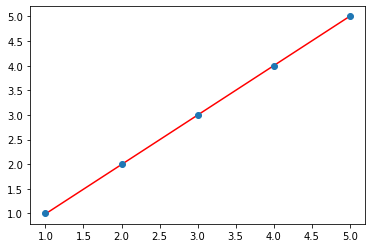

In [39]:
plt.plot(x_data, y_hat, 'r-')
plt.plot(x_data, y_data, 'o')
plt.show()

In [35]:
X = [5, 2.5, 8]

y_hat = W * X + b # 단순선형회귀 결과
y_hat

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([5.00667  , 2.4946702, 8.0210705], dtype=float32)>

## Optimizers

In [41]:
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)
lr = 0.01
EPOCH = 101

In [42]:
cost_func = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.SGD()

In [44]:
for i in range(EPOCH):
    with tf.GradientTape() as tape:
      y_hat = W * x_data + b
      cost = cost_func(y_data, y_hat) # 위의 MSE와 같음

      grads = tape.gradient(cost, [W,b])
      opt.apply_gradients(zip(grads, [W, b])) 

      if i % 10 == 0:
       print(f"W : {W.numpy()}, b : {b.numpy()}, cost : {cost}")

W : 2.452000141143799, b : 0.37599998712539673, cost : 45.660003662109375
W : 1.1036423444747925, b : 0.0033982964232563972, cost : 0.20633578300476074
W : 1.0128217935562134, b : -0.020914729684591293, cost : 0.001026112586259842
W : 1.0065230131149292, b : -0.021844686940312386, cost : 9.262979438062757e-05
W : 1.0059112310409546, b : -0.021226583048701286, cost : 8.265224460046738e-05
W : 1.0056878328323364, b : -0.020527100190520287, cost : 7.722109148744494e-05
W : 1.005496621131897, b : -0.019844047725200653, cost : 7.216302037704736e-05
W : 1.005313515663147, b : -0.019183281809091568, cost : 6.743684934917837e-05
W : 1.005136489868164, b : -0.018544474616646767, cost : 6.30190916126594e-05
W : 1.0049654245376587, b : -0.017926912754774094, cost : 5.889249223400839e-05
W : 1.0048000812530518, b : -0.017329951748251915, cost : 5.503660213435069e-05
